# Periodic Variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from scipy.special import iv

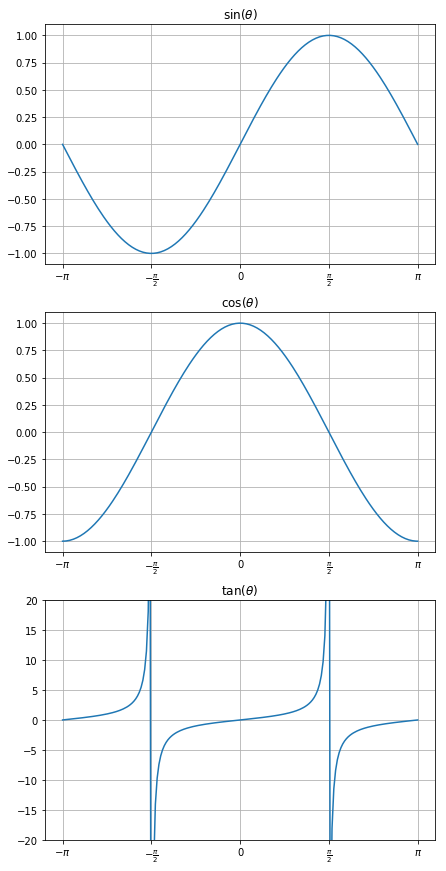

In [2]:
r_range = np.linspace(-pi, pi, 200)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7, 15))

ax[0].plot(r_range, np.sin(r_range))
ax[1].plot(r_range, np.cos(r_range))
ax[2].plot(r_range, np.tan(r_range))
ax[2].set_ylim(-20, 20)

titles = [r"$\sin(\theta)$", r"$\cos(\theta)$", r"$\tan(\theta)$"]

for x, title in zip(ax, titles):
    x.grid()
    x.set_xticks([-pi, -pi / 2, 0, pi / 2, pi])
    x.set_xticklabels([r"$-\pi$", r"$-\frac{\pi}{2}$", "0", r"$\frac{\pi}{2}$", r"$\pi$"])
    x.set_title(title)

In [3]:
np.random.seed(31415926)
thetas = np.random.randint(0, 360, size=5)
thetas = thetas * pi / 180 # np.deg2rad(thetas)
vcos = np.cos(thetas)
vsin = np.sin(thetas)

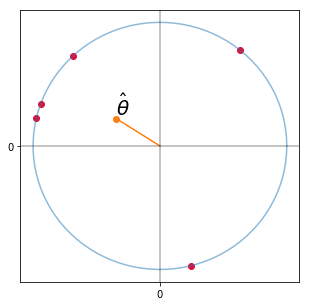

In [4]:
rs = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(5, 5))
plt.plot(np.cos(rs), np.sin(rs), alpha=0.5)
plt.scatter(vcos, vsin, c="crimson")
plt.scatter(vcos.mean(), vsin.mean(), c="tab:orange")
plt.plot((0, vcos.mean()), (0, vsin.mean()), c="tab:orange")
plt.text(vcos.mean(), vsin.mean(), r"$\hat \theta$", fontsize=20,
         horizontalalignment="left",
         verticalalignment="bottom");
plt.axvline(x="0", c="black", alpha=0.3)
plt.axhline(y="0", c="black", alpha=0.3);

The definition of the mean for a set of period variables $\{\theta_n\}_n$
$$
    \bar \theta = \tan^{-1}\left(\frac{\sum_n \sin(\theta_n)}{\sum_n \sin(\theta_n)}\right)
$$

Ensures that the location of the mean is **independent** of the origin of the angular coordinate.

In [5]:
np.arctan(vsin.sum() / vcos.sum())

-0.5698440542329537

In [6]:
np.arctan(np.sin(thetas - pi).sum() / np.cos(thetas - pi).sum())

-0.5698440542329536

## von Misses distributionn

The idea behind the von Mises distribution is to find a gaussian-like distribution along a cirle with unit radius.

In [7]:
def vMisses(x0, x1, mu0, mu1, sigma):
    return np.exp(- ((x0 - mu0) ** 2 + (x1 - mu1) ** 2) / (2 * sigma)) / (2 * pi * sigma)

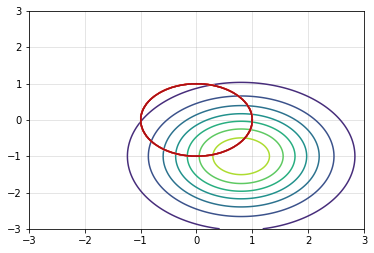

In [8]:
X, Y = np.mgrid[-3:3:0.005, -3:3:0.005]
plt.contour(X, Y, vMisses(X, Y, 0.8, -1, 1), )
plt.contour(X, Y, X**2 + Y ** 2 <= 1, cmap="Reds")
plt.grid(alpha=0.4)

The _von Mises_ distribution takes the form:
$$
    p(\theta|\theta_0, m) = \frac{1}{2\pi I_0(m)}\exp(m\cos(\theta - \theta_0))
$$

Where
* $\theta_0$ is the mean of the distribution
* $m$ is the precision of the distribution
* $I_0(m)$ is the zeroth-order Bessel function of the first kind

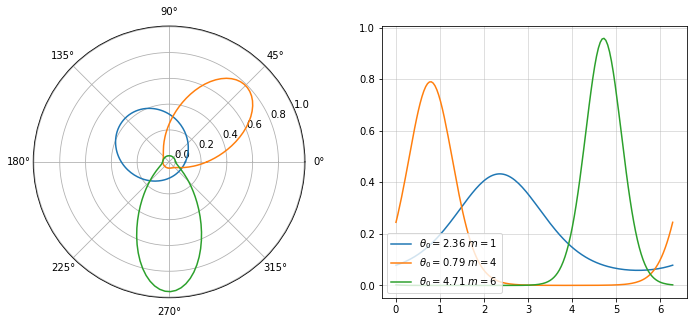

In [9]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection="polar")
ax2 = fig.add_subplot(122)

params = [(1, 3 * pi / 4), (4, pi / 4), (6, pi * 3 / 2)]

for m, theta_0 in params:
    npoints = 150
    theta = np.linspace(0, 2 * pi, npoints)
    von_mises = np.exp(m * np.cos(theta -  theta_0)) / (2 * pi * np.i0(m))

    ax1.plot(theta , von_mises);
    ax2.plot(theta, von_mises, label=r"$\theta_0={:0.2f} \ m={}$".format(theta_0, m))
ax2.grid(alpha=0.5)
ax2.legend(loc="lower left")

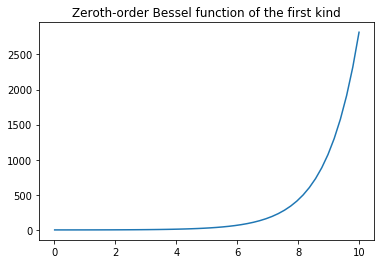

In [10]:
m = np.linspace(0.01, 10)
plt.plot(m, iv(0, m))
plt.title("Zeroth-order Bessel function of the first kind");

To compute the MLE for $\theta$ and $m$, we compute the log-likelihood of the von Mises distribution $p(\theta|\theta_0, m)$. For $\hat\theta_0$, the result is that of the definition for the mean of a periodic variable:

$$
    \hat\theta_0 = \tan^{-1}\left(\frac{\sum_n \sin\theta_n}{\sum_n \cos\theta_n}\right)
$$

In order to find $\hat m$, we arrive at the result

$$
    A(\hat m) = \frac{I_1(\hat m)}{I_0(\hat m)} = \left(\frac{1}{N}\sum_n \cos\theta_n\right)\cos\hat\theta_0 + \left(\frac{1}{N}\sum_n \sin\theta_n\right)\sin\hat\theta_0
$$

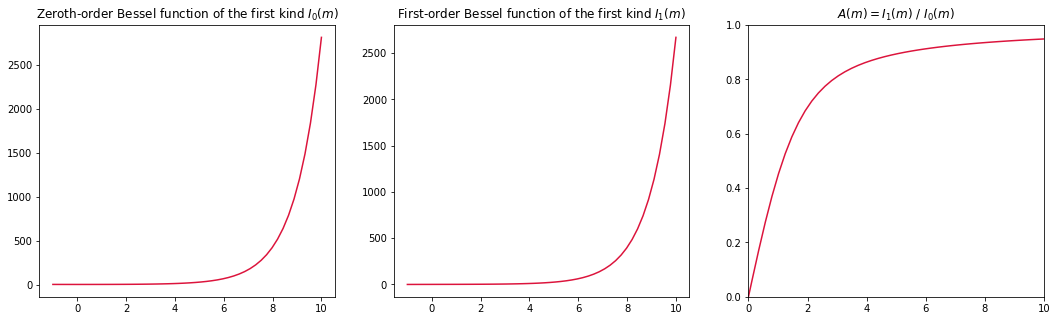

In [502]:
m = np.linspace(-1, 10)
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

I1 = iv(1, m)
I0 = iv(0, m)
A = I1 / I0

ax1.plot(m, iv(0, m), color="crimson")
ax1.set_title("Zeroth-order Bessel function of the first kind $I_0(m)$")

ax2.plot(m, iv(1, m), color="crimson")
ax2.set_title("First-order Bessel function of the first kind $I_1(m)$")

ax3.plot(m, A, color="crimson")
ax3.set_title(r"$A(m) = I_1(m) \ / \ I_0(m)$");

ax3.set_xlim((0, 10))
ax3.set_ylim((0, 1));

To find $\hat m$ suffices to invert the function $A$ numerically. This can be done using the bisection method

In [619]:
from numpy.random import vonmises, seed
seed(1643)

N = 5000
sample = vonmises(pi / 4, 6, N)
pi / 4

0.7853981633974483

In [620]:
theta_0 = np.arctan(np.sin(sample).sum() / np.cos(sample).sum())
phi = (np.cos(sample).sum() / N) * np.cos(theta_0) + (np.sin(sample).sum() / N) * np.sin(theta_0)

In [621]:
def A(m): return iv(1, m) / iv(0, m)
def err(Am, phi): return Am - phi

def bisection(f, x_plus, x_minus, tol=1e-6, maxiter=500):
    niter = 0
    while True:
        niter += 1
        v_plus = f(x_plus)
        v_minus = f(x_minus)

        x_mid = (x_plus + x_minus) / 2
        v_mid = f(x_mid)
        if np.sign(v_mid) == np.sign(v_plus):
            x_plus = x_mid
        else:
            x_minus = x_mid

        if niter == maxiter:
            print(f"Convergence not successful after {maxiter} tries...")
            return None
        elif np.abs(v_mid) < tol:
            return x_mid

In [622]:
m_plus, m_minus = 10, -5
m_hat = bisection(lambda x: err(A(x), phi), m_plus, m_minus)

In [623]:
print(f"Estimated theta_0: {theta_0:>7.4f}")
print(f"Estimated A(m): {phi:>10.4f}")
print(f"Estimated hat m: {m_hat:>9.4f}")

Estimated theta_0:  0.7984
Estimated A(m):     0.9117
Estimated hat m:    5.9565
